# Marketing Campaign Insights Analysis

**Dataset**: [Marketing Analytics dataset](https://www.kaggle.com/datasets/jackdaoud/marketing-data)

**Key Business Questions to Explore**

Which marketing campaigns yielded the highest result?

How does spending vary across product categories?

Who are the most valuable customers, and how do they respond to campaigns?

Which platforms drive the most engagement and conversions?

### 1. Upload the file

In [1]:
from google.colab import files

uploaded = files.upload()


Saving ifood_df.csv to ifood_df.csv


### 2. Load the data into a Pandas DataFrame

In [2]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

# Display the first few rows of the dataframe to understand its structure
print(df.head())

    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  e

### 3. Data Preprocessing

In [3]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

print()

# Check data types
print("Data types:")
print(df.dtypes)

print()

print(df.info())

Missing values in each column:
Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegu

Conclusions:


* Dataset's clear, let's go to work

### 4. Campaign success rates & top performers

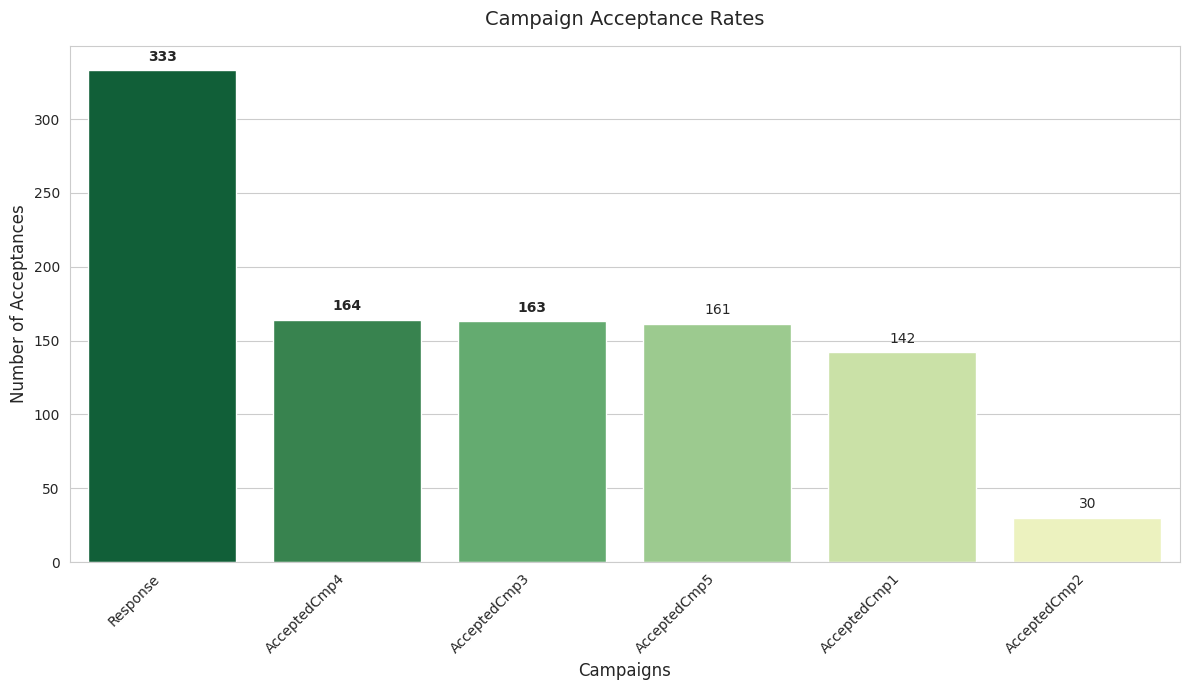

In [4]:
# Data for campaigns
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
campaign_acceptance = df[campaign_columns].sum()

# Sorting and identifying top-3
campaign_acceptance_sorted = campaign_acceptance.sort_values(ascending=False)
top_3 = campaign_acceptance_sorted.head(3).index
total_customers = len(df)  # Total number of customers for percentage
percentages = (campaign_acceptance_sorted / total_customers * 100).round(1)

# Setting style and figure
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")  # Valid style with grid
colors = sns.color_palette("YlGn", n_colors=len(campaign_columns))  # YlGn gradient palette
colors = colors[::-1]  # Reverse the palette to start with dark green

# Assign colors based on sorted values (darkest for highest, lightest for lowest)
color_mapping = {camp: colors[i] for i, camp in enumerate(campaign_acceptance_sorted.index)}
custom_colors = [color_mapping[camp] for camp in campaign_acceptance_sorted.index]

# Building the barplot with hue (using x as hue and disabling legend)
barplot = sns.barplot(x=campaign_acceptance_sorted.index, y=campaign_acceptance_sorted.values,
                      hue=campaign_acceptance_sorted.index, palette=custom_colors, legend=False)

# Setting titles and labels
plt.title('Campaign Acceptance Rates', fontsize=14, pad=15)
plt.xlabel('Campaigns', fontsize=12)
plt.ylabel('Number of Acceptances', fontsize=12)

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding annotations for all bars
for i, p in enumerate(barplot.patches):
    height = p.get_height()
    camp = campaign_acceptance_sorted.index[i]
    annotation = f'{height:.0f}'
    barplot.annotate(annotation,
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=10, weight='bold' if camp in top_3 else 'normal')

# Improving layout
plt.tight_layout()

# Show the plot
plt.show()

Conclusions:

* The target campaign (Response) was most effective.
* The other three (AcceptedCmp3,4,5)  go  by small margins.
* The worst was (AcceptedCmp2).

### 5. Spending across product category

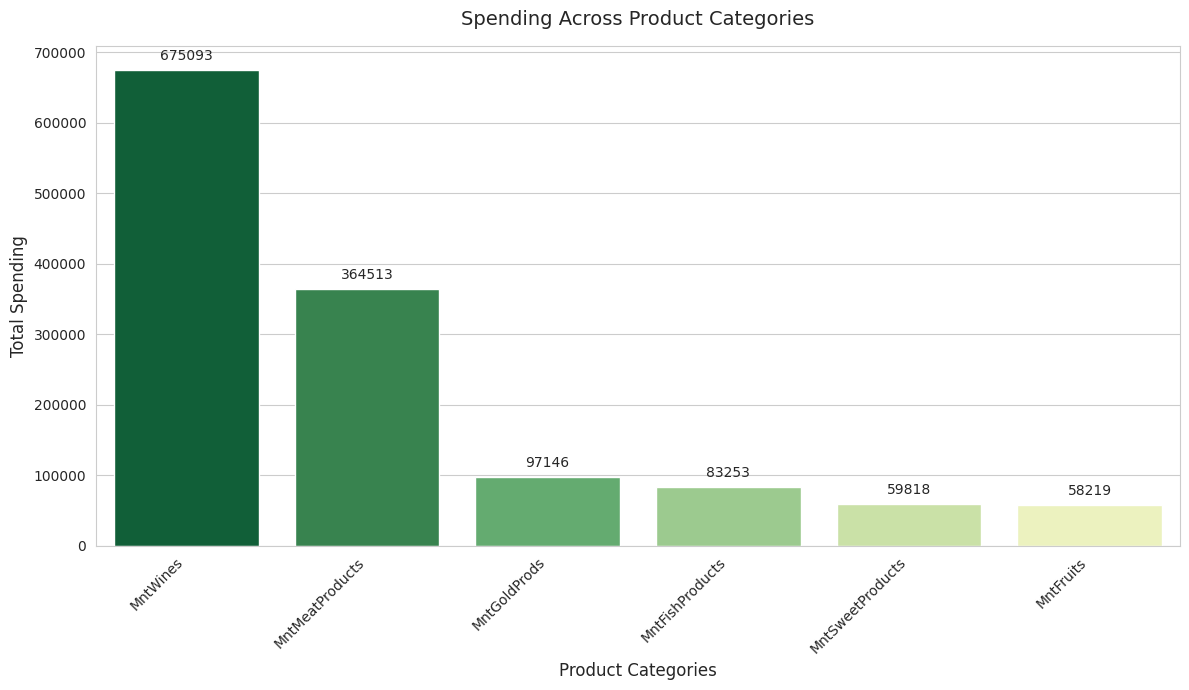

In [5]:
# Data for spending categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df[spending_columns].sum()

# Sorting spending data
spending_sorted = spending_data.sort_values(ascending=False)

# Setting style and figure
plt.figure(figsize=(12, 7))
sns.set_style("whitegrid")  # Valid style with grid
colors = sns.color_palette("YlGn", n_colors=len(campaign_columns))  # YlGn gradient palette
colors = colors[::-1]  # Reverse the palette to start with dark green

# Building the barplot with hue
barplot = sns.barplot(x=spending_sorted.index, y=spending_sorted.values,
                      hue=spending_sorted.index, palette=custom_colors, legend=False)

# Setting titles and labels
plt.title('Spending Across Product Categories', fontsize=14, pad=15)
plt.xlabel('Product Categories', fontsize=12)
plt.ylabel('Total Spending', fontsize=12)

# Rotating x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=10)

# Adding annotations for all bars
for p in barplot.patches:
    height = p.get_height()
    barplot.annotate(f'{height:.0f}',
                     (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points',
                     fontsize=10)

# Improving layout
plt.tight_layout()

# Show the plot
plt.show()


Conclusions:

- Wine is the most popular product category among customers.  
- Meat products are also a popular product category among customers.  
- Fruits, fish products, and sweets are less popular among customers.  



### 6. Most valuable customers - who are they?

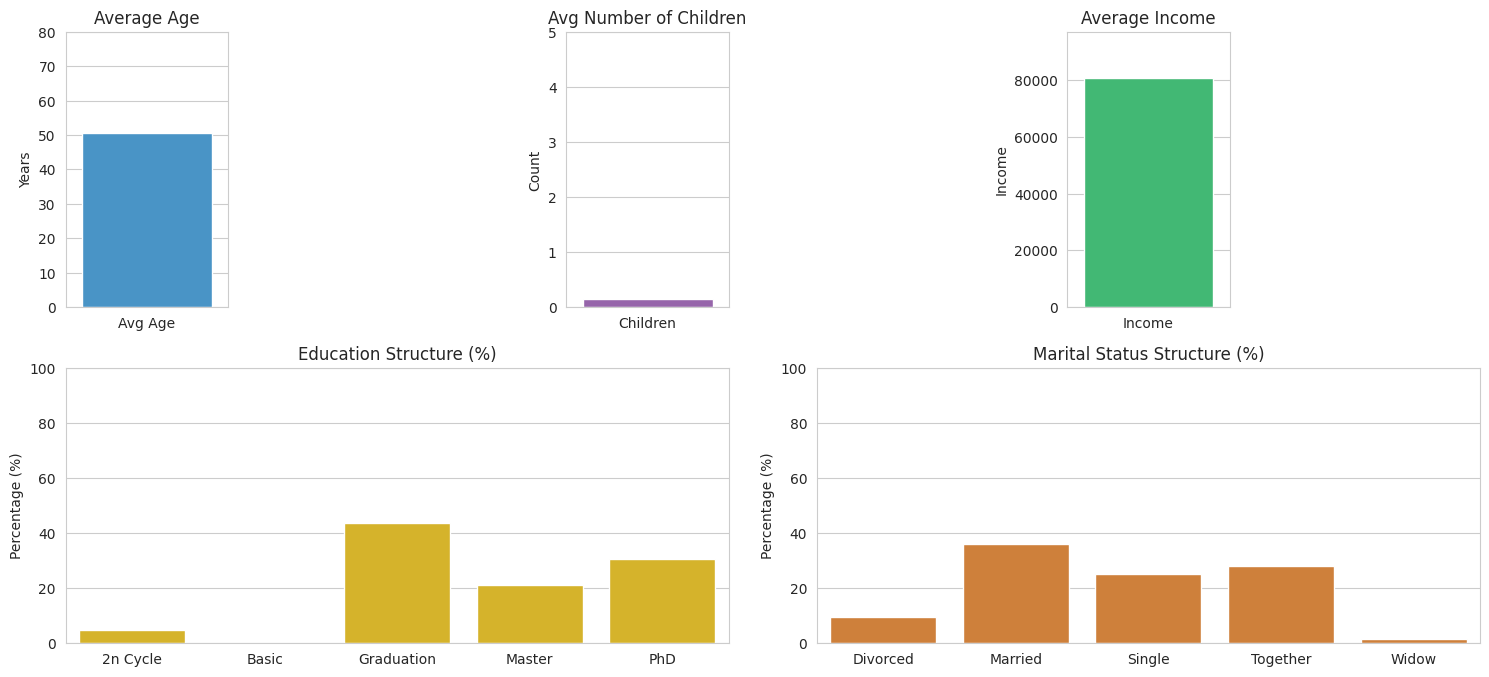

In [8]:
# Categorization of customers into groups by total spend taking into account the data

# Define the boundaries
mnt_min = df['MntTotal'].min()
mnt_max = df['MntTotal'].max()

# Divide the range into three equal parts
bins = [mnt_min, mnt_min + (mnt_max - mnt_min)/3, mnt_min + 2*(mnt_max - mnt_min)/3, mnt_max + 1]
labels = ['Low Spenders', 'Medium Spenders', 'High Spenders']
df['Spending_Group'] = pd.cut(df['MntTotal'], bins=bins, labels=labels, include_lowest=True)

# Группировка возраста
age_bins = [0, 30, 40, 50, 60, 70, float('inf')]
age_labels = ['<30', '30-40', '40-50', '50-60', '60-70', '>70']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Группировка дохода
income_bins = [0, 20000, 40000, 60000, 80000, 100000, float('inf')]
income_labels = ['<20k', '20k-40k', '40k-60k', '60k-80k', '80k-100k', '>100k']
df['Income_Group'] = pd.cut(df['Income'], bins=income_bins, labels=income_labels, include_lowest=True)

# Create a profile for each group
profile = df.groupby('Spending_Group', observed=True).agg({
    'Age': 'mean',
    'Age_Group': lambda x: x.value_counts().idxmax(),
    'Income': 'mean',
    'Income_Group': lambda x: x.value_counts().idxmax(),
    'Kidhome': 'mean',
    'Teenhome': 'mean',
    'education_2n Cycle': 'mean',
    'education_Basic': 'mean',
    'education_Graduation': 'mean',
    'education_Master': 'mean',
    'education_PhD': 'mean',
    'marital_Divorced': 'mean',
    'marital_Married': 'mean',
    'marital_Single': 'mean',
    'marital_Together': 'mean',
    'marital_Widow': 'mean'
}).reset_index()

# Renaming columns for convenience
profile.rename(columns={
    'Age': 'Avg Age',
    'Income': 'Avg Income',
    'Kidhome': 'Avg Kidhome',
    'Teenhome': 'Avg Teenhome',
    'education_2n Cycle': '% 2n Cycle',
    'education_Basic': '% Basic',
    'education_Graduation': '% Graduation',
    'education_Master': '% Master',
    'education_PhD': '% PhD',
    'marital_Divorced': '% Divorced',
    'marital_Married': '% Married',
    'marital_Single': '% Single',
    'marital_Together': '% Together',
    'marital_Widow': '% Widow'
}, inplace=True)

# Filter only High Spenders
high = profile[profile['Spending_Group'] == 'High Spenders']

# Visualization
fig = plt.figure(figsize=(15, 10))
sns.set_style('whitegrid')

# 6 columns, 3 grid lines
# Top charts
ax1 = plt.subplot2grid((3, 6), (0, 0))
ax2 = plt.subplot2grid((3, 6), (0, 2))
ax3 = plt.subplot2grid((3, 6), (0, 4))

# Bottom charts
ax4 = plt.subplot2grid((3, 6), (1, 0), colspan=3)
ax5 = plt.subplot2grid((3, 6), (1, 3), colspan=3)

# Data
age = high['Avg Age'].values[0]
income = high['Avg Income'].values[0]
kids = high['Avg Kidhome'].values[0]
teens = high['Avg Teenhome'].values[0]
total_children = kids + teens

edu_labels = ['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']
edu_values = [
    high['% 2n Cycle'].values[0] * 100,
    high['% Basic'].values[0] * 100,
    high['% Graduation'].values[0] * 100,
    high['% Master'].values[0] * 100,
    high['% PhD'].values[0] * 100
]

marital_labels = ['Divorced', 'Married', 'Single', 'Together', 'Widow']
marital_values = [
    high['% Divorced'].values[0] * 100,
    high['% Married'].values[0] * 100,
    high['% Single'].values[0] * 100,
    high['% Together'].values[0] * 100,
    high['% Widow'].values[0] * 100
]

# Top row
sns.barplot(x=['Avg Age'], y=[age], ax=ax1, color='#3498db')
ax1.set_ylim(0, max(age + 5, 80))
ax1.set_title('Average Age')
ax1.set_ylabel('Years')

sns.barplot(x=['Children'], y=[total_children], ax=ax2, color='#9b59b6')
ax2.set_ylim(0, max(total_children + 1, 5))
ax2.set_title('Avg Number of Children')
ax2.set_ylabel('Count')

sns.barplot(x=['Income'], y=[income], ax=ax3, color='#2ecc71')
ax3.set_ylim(0, income * 1.2)
ax3.set_title('Average Income')
ax3.set_ylabel('Income')

# Bottom row
sns.barplot(x=edu_labels, y=edu_values, ax=ax4, color='#f1c40f')
ax4.set_ylim(0, 100)
ax4.set_title('Education Structure (%)')
ax4.set_ylabel('Percentage (%)')

sns.barplot(x=marital_labels, y=marital_values, ax=ax5, color='#e67e22')
ax5.set_ylim(0, 100)
ax5.set_title('Marital Status Structure (%)')
ax5.set_ylabel('Percentage (%)')

plt.tight_layout()
plt.show()


Conclusions:
Valued customer profile
* Age: 50
* Children at home: 0
* Income: 80 000$
* Education: Graduation or higher
* Marital status: мarried or together аnd a little less single

### 7. Most valuable customers - how do they respond to campaigns?

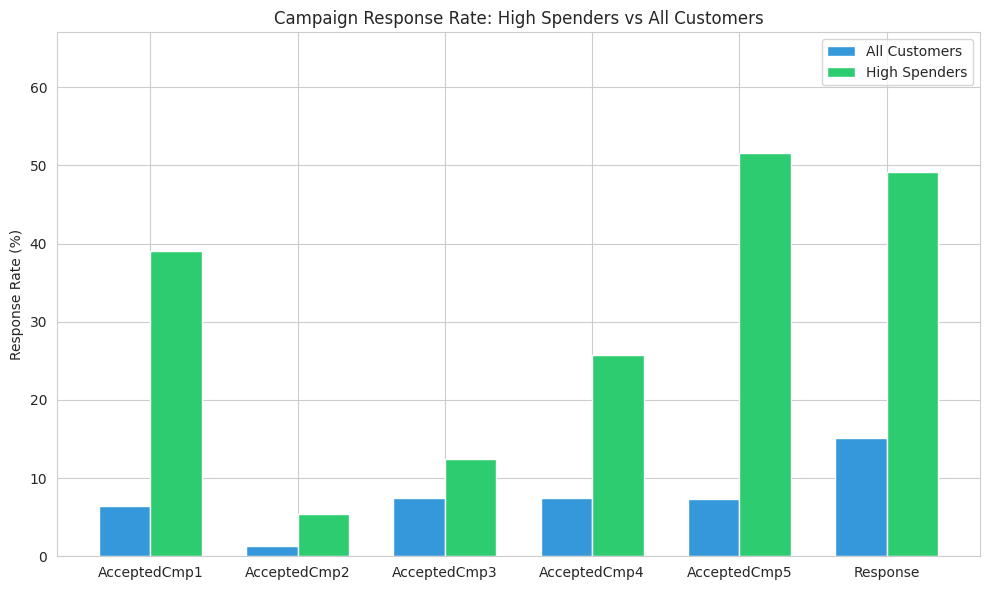

In [9]:
# List of campaigns
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

# High Spenders filtration
high_df = df[df['Spending_Group'] == 'High Spenders']

# Response counts for High Spenders and the entire base
high_rates = []
all_rates = []

for cmp in campaigns:
    high_rate = (high_df[cmp].sum() / high_df.shape[0]) * 100
    all_rate = (df[cmp].sum() / df.shape[0]) * 100

    high_rates.append(high_rate)
    all_rates.append(all_rate)

# Vizualization
x = range(len(campaigns))
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')

bar_width = 0.35
plt.bar([p - bar_width/2 for p in x], all_rates, width=bar_width, color='#3498db', label='All Customers')
plt.bar([p + bar_width/2 for p in x], high_rates, width=bar_width, color='#2ecc71', label='High Spenders')

plt.xticks(x, campaigns)
plt.ylabel('Response Rate (%)')
plt.title('Campaign Response Rate: High Spenders vs All Customers')
plt.ylim(0, max(max(high_rates), max(all_rates)) * 1.3)
plt.legend()
plt.tight_layout()
plt.show()


Conclusions:
The most valuable customers respond well to all campaigns. The fifth campaign and the target campaign are particularly successful.

### 8. Сhannel correlations with campaign acceptance

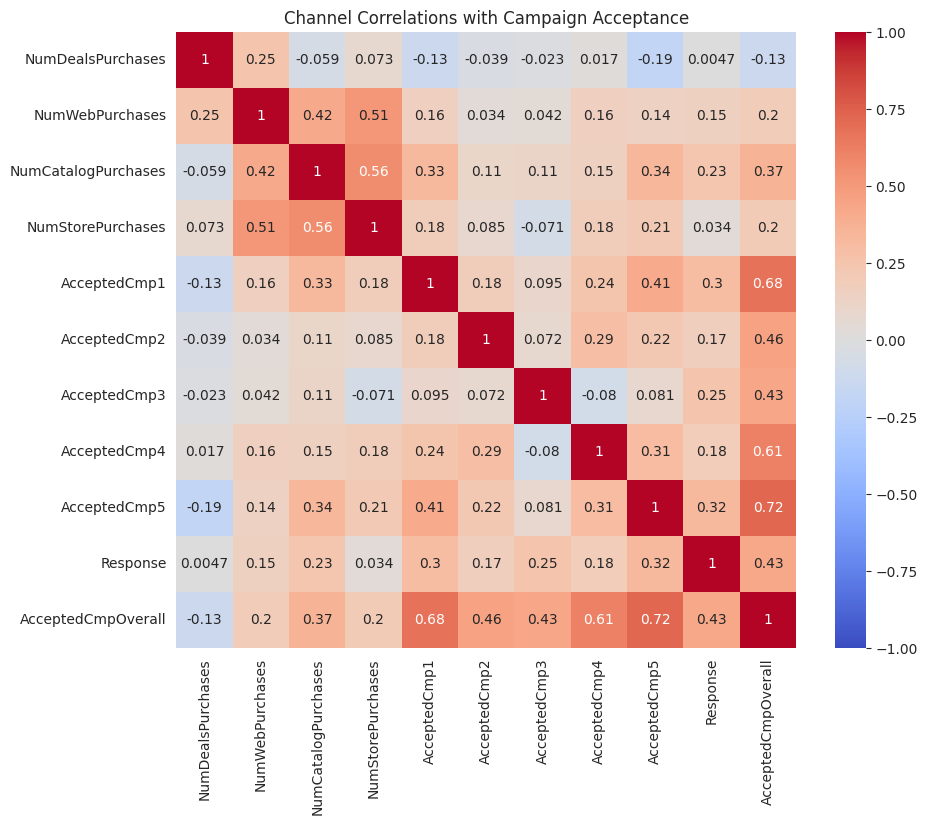

In [10]:
columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'AcceptedCmpOverall']
corr = df[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Channel Correlations with Campaign Acceptance')
plt.show()

### 9. Channel correlations with spending

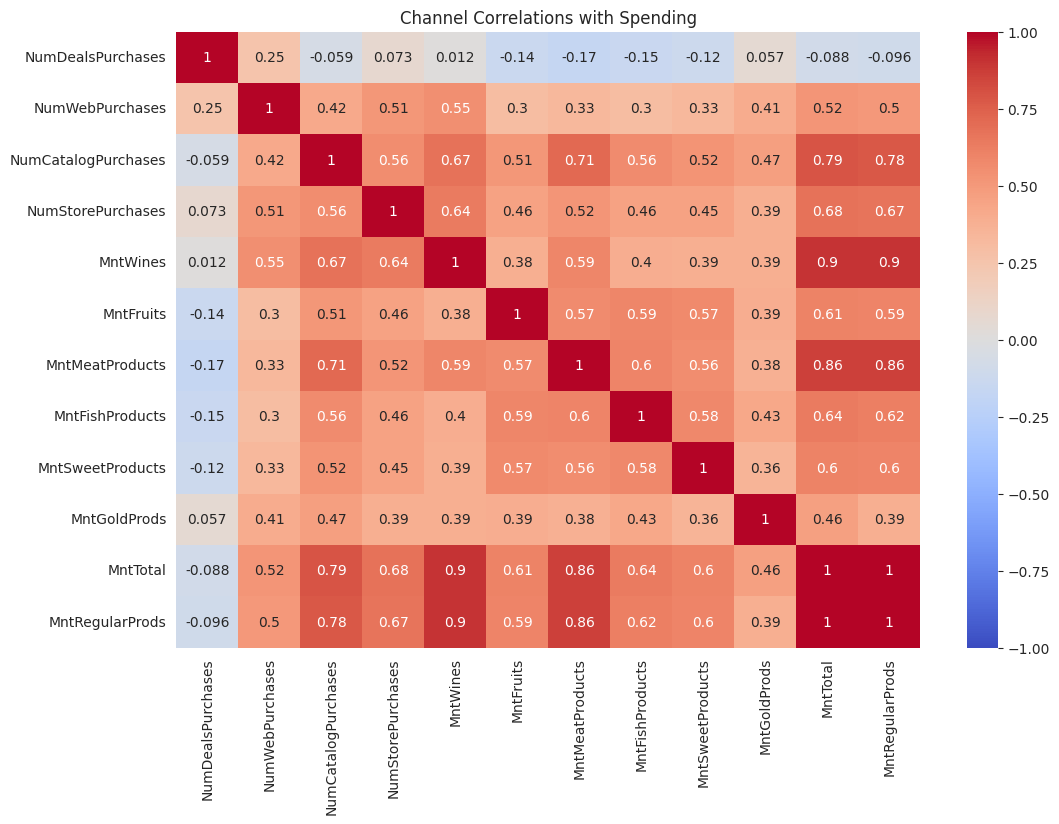

In [11]:
columns = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
           'MntGoldProds', 'MntTotal', 'MntRegularProds']
corr = df[columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Channel Correlations with Spending')
plt.show()

Conclusions:

* Offline сhannels are most valuable: store purchases (NumStorePurchases) and catalog purchases (NumCatalogPurchases) show the strongest positive correlation with both high overall spending (MntTotal) and marketing campaign acceptance (AcceptedCmpOverall). This suggests that customers utilizing these channels are a prime audience for revenue growth and marketing effectiveness.

Brief explanation: These customers spend more money and are more responsive to our marketing efforts.

* "Deal" shoppers are a lower-value segment: NumDealsPurchases (purchases made through deals/discounts) have a negative correlation with both overall spending and campaign acceptance.

Brief explanation: discount-seeking customers spend less and are less receptive to general marketing campaigns, requiring a distinct strategy.

* Interrelation in category spending: there is a strong positive correlation among spending on wines, meat, fish, and sweet products.

Brief explanation: customers purchasing one of these categories often buy others, presenting cross-selling opportunities.